In [33]:
import pandas as pd
import yfinance as yf 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [64]:
data = pd.read_csv("base_FD_cac40.csv", index_col="date")

In [66]:
data["Cac40"]=yf.download("^FCHI","2000-12-01","2023-09-06").Close

[*********************100%%**********************]  1 of 1 completed


C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\2226209021.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Cac40"]=yf.download("^FCHI","2000-12-01","2023-09-06").Close


In [67]:
data.dropna()

,brent,eurusd,highyield.ccc.usa,macd.cac40.fra,prate.fra,tbrent,teurusd,up.cac40.fra,vix,euribor3.euz,ff.usa,infl.euz,infl.fra,ltrate.fra,prate.euz,slope.euz,slope.fra,unemp.fra,Cac40
date,,,,,,,,,,,,,,,,,,,
12/12/2000,27.48,0.8782,28.43,-0.952893,4.75,-16.928658,1.879350,6288.753921,24.88,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,6047.660156
13/12/2000,25.92,0.8748,28.32,-0.955094,4.75,-21.287580,1.922405,6244.207131,23.63,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5962.290039
14/12/2000,25.12,0.8839,28.43,-1.021395,4.75,-26.377491,2.826896,6197.947694,24.86,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5905.649902
15/12/2000,25.52,0.8984,27.92,-1.150360,4.75,-22.783661,4.843039,6183.202964,26.55,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5839.540039
18/12/2000,25.46,0.8966,27.98,-1.175013,4.75,-25.271500,5.049795,6181.969603,27.70,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5887.490234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/08/2023,86.88,1.0868,13.46,-0.041333,4.25,4.347826,-1.065089,7423.318428,13.57,3.780304,5.33,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,7316.700195
01/09/2023,88.63,1.0844,13.46,-0.037929,4.25,4.038033,-0.804976,7421.884075,13.09,3.780304,5.33,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,6907.359863
02/09/2023,88.63,1.0844,13.46,-0.037929,4.25,4.038033,-0.804976,7421.884075,13.09,3.780304,5.33,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,7188.359863


In [68]:
base = data.dropna()
base

,brent,eurusd,highyield.ccc.usa,macd.cac40.fra,prate.fra,tbrent,teurusd,up.cac40.fra,vix,euribor3.euz,ff.usa,infl.euz,infl.fra,ltrate.fra,prate.euz,slope.euz,slope.fra,unemp.fra,Cac40
date,,,,,,,,,,,,,,,,,,,
12/12/2000,27.48,0.8782,28.43,-0.952893,4.75,-16.928658,1.879350,6288.753921,24.88,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,6047.660156
13/12/2000,25.92,0.8748,28.32,-0.955094,4.75,-21.287580,1.922405,6244.207131,23.63,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5962.290039
14/12/2000,25.12,0.8839,28.43,-1.021395,4.75,-26.377491,2.826896,6197.947694,24.86,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5905.649902
15/12/2000,25.52,0.8984,27.92,-1.150360,4.75,-22.783661,4.843039,6183.202964,26.55,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5839.540039
18/12/2000,25.46,0.8966,27.98,-1.175013,4.75,-25.271500,5.049795,6181.969603,27.70,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5887.490234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/08/2023,86.88,1.0868,13.46,-0.041333,4.25,4.347826,-1.065089,7423.318428,13.57,3.780304,5.33,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,7316.700195
01/09/2023,88.63,1.0844,13.46,-0.037929,4.25,4.038033,-0.804976,7421.884075,13.09,3.780304,5.33,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,6907.359863
02/09/2023,88.63,1.0844,13.46,-0.037929,4.25,4.038033,-0.804976,7421.884075,13.09,3.780304,5.33,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,7188.359863


In [69]:
base["returns"]=np.log(base.Cac40/base.Cac40.shift())

C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\3056705563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base["returns"]=np.log(base.Cac40/base.Cac40.shift())


In [70]:
base["notation"]=0

C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\326989915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base["notation"]=0


In [71]:
c=[]

In [72]:
for i in range(len(base["Cac40"])):
    if base["returns"].iloc[i] < -0.1 :
        base["notation"].iloc[i] = 1 
        c.append(base["returns"].iloc[i])

C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\802148628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base["notation"].iloc[i] = 1


In [73]:
base["rolling"]=base.notation.rolling(window=7).max()

C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\3512547189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base["rolling"]=base.notation.rolling(window=7).max()


In [74]:
base["rollinglag"]=base["rolling"].shift(-6)

C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\2320769278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base["rollinglag"]=base["rolling"].shift(-6)


In [75]:
base.head(50)

,brent,eurusd,highyield.ccc.usa,macd.cac40.fra,prate.fra,tbrent,teurusd,up.cac40.fra,vix,euribor3.euz,...,ltrate.fra,prate.euz,slope.euz,slope.fra,unemp.fra,Cac40,returns,notation,rolling,rollinglag
date,,,,,,,,,,,,,,,,,,,,,
12/12/2000,27.48,0.8782,28.43,-0.952893,4.75,-16.928658,1.879350,6288.753921,24.88,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,6047.660156,NaN,0,NaN,0.0
13/12/2000,25.92,0.8748,28.32,-0.955094,4.75,-21.287580,1.922405,6244.207131,23.63,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5962.290039,-0.014217,0,NaN,0.0
14/12/2000,25.12,0.8839,28.43,-1.021395,4.75,-26.377491,2.826896,6197.947694,24.86,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5905.649902,-0.009545,0,NaN,0.0
15/12/2000,25.52,0.8984,27.92,-1.150360,4.75,-22.783661,4.843039,6183.202964,26.55,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5839.540039,-0.011257,0,NaN,0.0
18/12/2000,25.46,0.8966,27.98,-1.175013,4.75,-25.271500,5.049795,6181.969603,27.70,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5887.490234,0.008178,0,NaN,0.0
19/12/2000,24.39,0.8903,28.06,-1.085719,4.75,-28.264706,4.889255,6171.606625,27.17,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5958.859863,0.012049,0,NaN,0.0
20/12/2000,22.72,0.9059,28.12,-1.261654,4.75,-32.601602,6.903469,6184.902977,31.74,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5766.299805,-0.032849,0,0.0,0.0
21/12/2000,22.97,0.9146,28.26,-1.396448,4.75,-32.520564,8.506347,6186.783720,29.66,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5758.919922,-0.001281,0,0.0,0.0
22/12/2000,22.97,0.9240,28.23,-1.453709,4.75,-32.953882,9.647561,6164.315765,27.55,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5783.729980,0.004299,0,0.0,0.0


In [76]:
#d=base[base["rollinglag"]==1]

In [77]:
base

,brent,eurusd,highyield.ccc.usa,macd.cac40.fra,prate.fra,tbrent,teurusd,up.cac40.fra,vix,euribor3.euz,...,ltrate.fra,prate.euz,slope.euz,slope.fra,unemp.fra,Cac40,returns,notation,rolling,rollinglag
date,,,,,,,,,,,,,,,,,,,,,
12/12/2000,27.48,0.8782,28.43,-0.952893,4.75,-16.928658,1.879350,6288.753921,24.88,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,6047.660156,NaN,0,NaN,0.0
13/12/2000,25.92,0.8748,28.32,-0.955094,4.75,-21.287580,1.922405,6244.207131,23.63,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5962.290039,-0.014217,0,NaN,0.0
14/12/2000,25.12,0.8839,28.43,-1.021395,4.75,-26.377491,2.826896,6197.947694,24.86,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5905.649902,-0.009545,0,NaN,0.0
15/12/2000,25.52,0.8984,27.92,-1.150360,4.75,-22.783661,4.843039,6183.202964,26.55,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5839.540039,-0.011257,0,NaN,0.0
18/12/2000,25.46,0.8966,27.98,-1.175013,4.75,-25.271500,5.049795,6181.969603,27.70,4.939158,...,5.04,4.75,0.151129,0.100842,8.7,5887.490234,0.008178,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/08/2023,86.88,1.0868,13.46,-0.041333,4.25,4.347826,-1.065089,7423.318428,13.57,3.780304,...,3.04,4.25,-0.536187,-0.631810,7.1,7316.700195,-0.006498,0,0.0,NaN
01/09/2023,88.63,1.0844,13.46,-0.037929,4.25,4.038033,-0.804976,7421.884075,13.09,3.780304,...,3.04,4.25,-0.536187,-0.631810,7.1,6907.359863,-0.057572,0,0.0,NaN
02/09/2023,88.63,1.0844,13.46,-0.037929,4.25,4.038033,-0.804976,7421.884075,13.09,3.780304,...,3.04,4.25,-0.536187,-0.631810,7.1,7188.359863,0.039876,0,0.0,NaN


In [78]:
base.fillna(0,inplace=True)

C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\4266933310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.fillna(0,inplace=True)


In [79]:
base.index = pd.to_datetime(base.index, format='%d/%m/%Y', errors='coerce')

In [80]:
base = base.drop("notation", axis=1)


In [81]:
base = base.drop("rolling", axis=1)

In [82]:
base

,brent,eurusd,highyield.ccc.usa,macd.cac40.fra,prate.fra,tbrent,teurusd,up.cac40.fra,vix,euribor3.euz,...,infl.euz,infl.fra,ltrate.fra,prate.euz,slope.euz,slope.fra,unemp.fra,Cac40,returns,rollinglag
date,,,,,,,,,,,,,,,,,,,,,
2000-12-12,27.48,0.8782,28.43,-0.952893,4.75,-16.928658,1.879350,6288.753921,24.88,4.939158,...,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,6047.660156,0.000000,0.0
2000-12-13,25.92,0.8748,28.32,-0.955094,4.75,-21.287580,1.922405,6244.207131,23.63,4.939158,...,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5962.290039,-0.014217,0.0
2000-12-14,25.12,0.8839,28.43,-1.021395,4.75,-26.377491,2.826896,6197.947694,24.86,4.939158,...,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5905.649902,-0.009545,0.0
2000-12-15,25.52,0.8984,27.92,-1.150360,4.75,-22.783661,4.843039,6183.202964,26.55,4.939158,...,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5839.540039,-0.011257,0.0
2000-12-18,25.46,0.8966,27.98,-1.175013,4.75,-25.271500,5.049795,6181.969603,27.70,4.939158,...,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5887.490234,0.008178,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,86.88,1.0868,13.46,-0.041333,4.25,4.347826,-1.065089,7423.318428,13.57,3.780304,...,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,7316.700195,-0.006498,0.0
2023-09-01,88.63,1.0844,13.46,-0.037929,4.25,4.038033,-0.804976,7421.884075,13.09,3.780304,...,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,6907.359863,-0.057572,0.0
2023-09-02,88.63,1.0844,13.46,-0.037929,4.25,4.038033,-0.804976,7421.884075,13.09,3.780304,...,8.520541,7.294778,3.04,4.25,-0.536187,-0.631810,7.1,7188.359863,0.039876,0.0


In [83]:
# Data Splitting
#train = base[base.index.year <= 2014]
#test = base[base.index.year >= 2015]

In [84]:
#X_train = train.drop("rollinglag", axis=1)
#y_train = train['rollinglag']
#X_test = test.drop('rollinglag', axis = 1) # Selecting Predictor Variables
#y_test = test['rollinglag']

In [85]:
#training the model
#rfr.fit(x_train,y_train)

In [86]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) splitter d'une manière aléatoire


#Evaluatiing the randomforest regressor Model

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [88]:
# Data Splitting
train = base[base.index.year <= 2014]
test = base[base.index.year >= 2015]

In [89]:
X_train = train.drop("rollinglag", axis=1)
y_train = train['rollinglag']
X_test = test.drop('rollinglag', axis = 1) # Selecting Predictor Variables
y_test = test['rollinglag']

In [90]:
X_train

,brent,eurusd,highyield.ccc.usa,macd.cac40.fra,prate.fra,tbrent,teurusd,up.cac40.fra,vix,euribor3.euz,ff.usa,infl.euz,infl.fra,ltrate.fra,prate.euz,slope.euz,slope.fra,unemp.fra,Cac40,returns
date,,,,,,,,,,,,,,,,,,,,
2000-12-12,27.48,0.8782,28.43,-0.952893,4.75,-16.928658,1.879350,6288.753921,24.88,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,6047.660156,0.000000
2000-12-13,25.92,0.8748,28.32,-0.955094,4.75,-21.287580,1.922405,6244.207131,23.63,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5962.290039,-0.014217
2000-12-14,25.12,0.8839,28.43,-1.021395,4.75,-26.377491,2.826896,6197.947694,24.86,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5905.649902,-0.009545
2000-12-15,25.52,0.8984,27.92,-1.150360,4.75,-22.783661,4.843039,6183.202964,26.55,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5839.540039,-0.011257
2000-12-18,25.46,0.8966,27.98,-1.175013,4.75,-25.271500,5.049795,6181.969603,27.70,4.939158,6.40,2.567188,1.782025,5.04,4.75,0.151129,0.100842,8.7,5887.490234,0.008178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-23,60.30,1.2213,11.23,-0.273182,0.05,-24.293785,-1.587429,4509.767658,14.80,0.080905,0.12,-0.170085,0.090244,0.92,0.05,1.258975,0.839095,10.5,4314.970215,0.014130
2014-12-24,59.84,1.2219,11.21,-0.135550,0.05,-23.045267,-1.650032,4501.833847,14.37,0.080905,0.12,-0.170085,0.090244,0.92,0.05,1.258975,0.839095,10.5,4295.850098,-0.004441
2014-12-29,58.94,1.2197,11.21,0.167073,0.05,-18.082001,-2.228457,4473.193813,15.06,0.080905,0.12,-0.170085,0.090244,0.92,0.05,1.258975,0.839095,10.5,4317.930176,0.005127


In [91]:
# Créez le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Vous pouvez ajuster les hyperparamètres


In [92]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [93]:
y_pred = rf_model.predict(X_test)


In [94]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitude (Accuracy) : {accuracy:.2f}')


Exactitude (Accuracy) : 0.80


In [95]:
dfr=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dfr.reset_index(drop=True, inplace=True)
dfr


,Actual,Predicted
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2200,0.0,0.0
2201,0.0,0.0
2202,0.0,0.0
2203,0.0,0.0


In [96]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\1732417999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color='r', label = 'Actual Price', hist = False)
C:\Users\Kamir\AppData\Local\Temp\ipykernel_11748\1732417999.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='Predicted', ylabel='Density'>

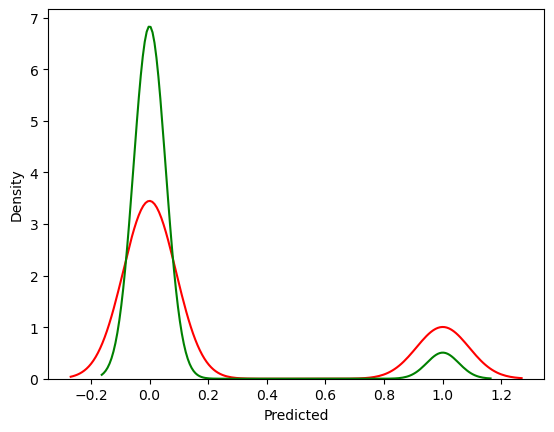

In [97]:
ax = sns.distplot(dfr['Actual'], color='r', label = 'Actual Price', hist = False)
sns.distplot(dfr['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

In [98]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
y_prob


array([0.02, 0.05, 0.01, ..., 0.39, 0.42, 0.41])

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

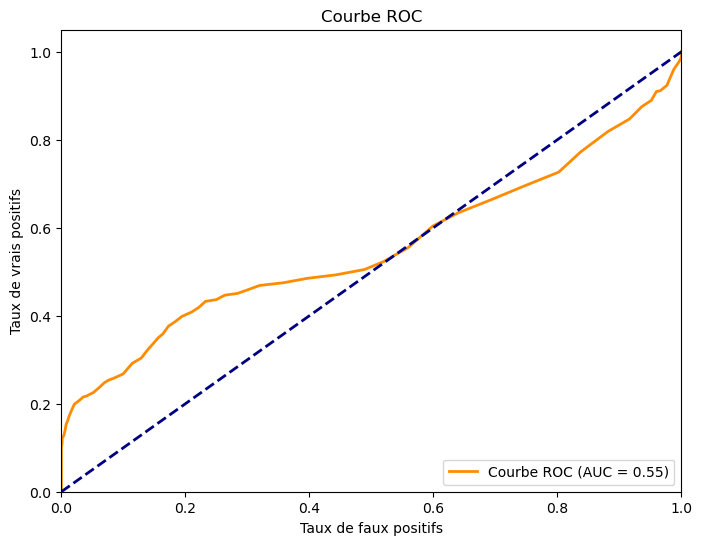

In [101]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [104]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

KeyboardInterrupt: 

In [105]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=4)

In [106]:
params = rf_model.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [107]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [108]:
y_pred = rf_model.predict(X_test)


In [109]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitude (Accuracy) : {accuracy:.2f}')


Exactitude (Accuracy) : 0.81


In [120]:
y_prob = rf_model.predict_proba(X_test)[:, 1]


0.6056779788803076

In [111]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

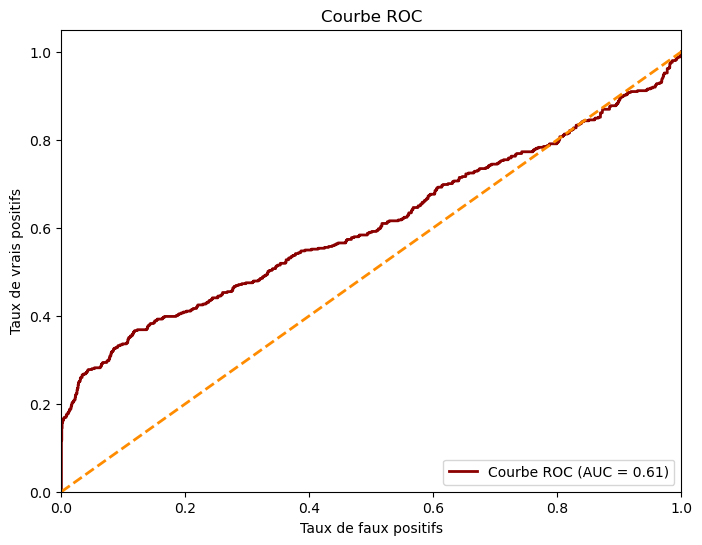

In [133]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Ou RandomForestRegressor si c'est une régression
import pprint

# Créez votre modèle RandomForest

# Obtenez les paramètres du modèle
params = rf_model.get_params()

# Affichez les paramètres à l'aide de pprint pour une meilleure lisibilité
pprint.pprint(params)
